## Load and Process Prediction data

In [1]:
import pandas as pd

In [3]:
def simple_response_parser(response):
    """
    Split the response into Steps, extract the symptoms, category and score.
    Works for simple PHQ9 prompt template
    """
    step_start_idxs = []
    for i in range(1, 4):
        step_start_idxs.append(response.find(f"STEP {i}:"))
    
    step_texts = {}
    step_texts[1] = response[step_start_idxs[0]:step_start_idxs[1]].strip()
    step_texts[2] = response[step_start_idxs[1]:step_start_idxs[2]].strip()
    step_texts[3] = response[step_start_idxs[2]:].strip()
    
    symptoms = step_texts[1]
    symptoms = symptoms.replace("STEP 1:", "").strip()
    
    category_text = step_texts[2]
    category_text = category_text.replace("STEP 2:", "").strip()
    try:
        category = category_text.split("Category: ")[1].split('\n')[0].strip()
    except:
        category = ''
    category_text = category_text.split("Category: ")[0].strip()
    
    score_text = step_texts[3]
    score_text = score_text.replace("STEP 3:", "").strip()
    try:
        score = score_text.split("Score: ")[1].split('\n')[0].strip()
    except:
        score = None
    score_text = score_text.split("Score: ")[0].strip()
    
    return {'symptoms': symptoms, 
            'category_text': category_text, 'category': category, 
            'score_text': score_text, 'score': score}

In [4]:
RESPONSE_FILE_PATH = "/chronos_data/avirinchipur/reasoning_for_psych/expts/responses/expt_gpt-4.dep_list_evidence_classify_estimate.csv"

In [5]:
response_df = pd.read_csv(RESPONSE_FILE_PATH)
response_df.head()

,user_id,input_text,target_value,response_text,user_text
0,1,"[{'role': 'system', 'content': 'You are a help...",0.0,STEP 1: The text provided does not show any in...,"Over the past two weeks, I have not been depre..."
1,2,"[{'role': 'system', 'content': 'You are a help...",17.0,STEP 1: The indications or symptoms of depress...,I don't think I have felt depressed. I'm not f...
2,3,"[{'role': 'system', 'content': 'You are a help...",21.0,STEP 1: The indications or symptoms of depress...,I have been depressed because I am worried abo...
3,4,"[{'role': 'system', 'content': 'You are a help...",13.0,STEP 1: The indications or symptoms of depress...,Over the past 2 weeks i have been feeling depr...
4,5,"[{'role': 'system', 'content': 'You are a help...",9.0,STEP 1: The indications or symptoms of depress...,yes very much just seem everything is getting ...


In [6]:
example_response_text = response_df.sample()['response_text'].values[0]
print (example_response_text)

STEP 1: The indications or symptoms of depression evident in the text include:

1. The individual is under medication for depression.
2. The individual has noticed a difference in their mental state due to lack of exercise, which could be a sign of mood changes or increased sensitivity to stress, both of which are symptoms of depression.

STEP 2: Based on these identified symptoms, the individual's potential level of depression can be categorized as Mild. This is because the individual is under medication and has been able to manage their symptoms effectively with exercise and medication. However, the recent lack of exercise has caused some noticeable changes, indicating that the individual may still be experiencing some mild symptoms of depression.

Category: Mild

STEP 3: Considering the individual's ability to manage their symptoms and the fact that they are under medication, but also taking into account the recent changes due to lack of exercise, a depression severity score of 6 wo

In [7]:
simple_response_parser(example_response_text)

{'symptoms': 'The indications or symptoms of depression evident in the text include:\n\n1. The individual is under medication for depression.\n2. The individual has noticed a difference in their mental state due to lack of exercise, which could be a sign of mood changes or increased sensitivity to stress, both of which are symptoms of depression.',
 'category_text': "Based on these identified symptoms, the individual's potential level of depression can be categorized as Mild. This is because the individual is under medication and has been able to manage their symptoms effectively with exercise and medication. However, the recent lack of exercise has caused some noticeable changes, indicating that the individual may still be experiencing some mild symptoms of depression.",
 'category': 'Mild',
 'score_text': "Considering the individual's ability to manage their symptoms and the fact that they are under medication, but also taking into account the recent changes due to lack of exercise, 

In [8]:
response_df['parsed_response'] = response_df['response_text'].apply(simple_response_parser)

In [9]:
response_df.head()

,user_id,input_text,target_value,response_text,user_text,parsed_response
0,1,"[{'role': 'system', 'content': 'You are a help...",0.0,STEP 1: The text provided does not show any in...,"Over the past two weeks, I have not been depre...",{'symptoms': 'The text provided does not show ...
1,2,"[{'role': 'system', 'content': 'You are a help...",17.0,STEP 1: The indications or symptoms of depress...,I don't think I have felt depressed. I'm not f...,{'symptoms': 'The indications or symptoms of d...
2,3,"[{'role': 'system', 'content': 'You are a help...",21.0,STEP 1: The indications or symptoms of depress...,I have been depressed because I am worried abo...,{'symptoms': 'The indications or symptoms of d...
3,4,"[{'role': 'system', 'content': 'You are a help...",13.0,STEP 1: The indications or symptoms of depress...,Over the past 2 weeks i have been feeling depr...,{'symptoms': 'The indications or symptoms of d...
4,5,"[{'role': 'system', 'content': 'You are a help...",9.0,STEP 1: The indications or symptoms of depress...,yes very much just seem everything is getting ...,{'symptoms': 'The indications or symptoms of d...


In [10]:
parsed_response_df = pd.DataFrame(response_df['parsed_response'].tolist(), index=response_df.index)

In [11]:
parsed_response_df

,symptoms,category_text,category,score_text,score
0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0
1,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5
2,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14
3,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10
4,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20
...,...,...,...,...,...
951,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14
952,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14
953,The indications or symptoms of depression evid...,"Based on the identified symptom, the individua...",Mild,Given the presence of mood swings but absence ...,5
954,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Severe,Considering the severity and number of symptom...,23


In [12]:
df = pd.concat([response_df[['user_id', 'user_text', 'target_value']].reset_index(drop=True), parsed_response_df], axis=1)
df.head()

,user_id,user_text,target_value,symptoms,category_text,category,score_text,score
0,1,"Over the past two weeks, I have not been depre...",0.0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0
1,2,I don't think I have felt depressed. I'm not f...,17.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5
2,3,I have been depressed because I am worried abo...,21.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14
3,4,Over the past 2 weeks i have been feeling depr...,13.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10
4,5,yes very much just seem everything is getting ...,9.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20


In [13]:
df.score = df.score.astype(float)
df = df.rename(columns={'score': 'gpt4_predicted_value'})
df.head()

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value
0,1,"Over the past two weeks, I have not been depre...",0.0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0.0
1,2,I don't think I have felt depressed. I'm not f...,17.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5.0
2,3,I have been depressed because I am worried abo...,21.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
3,4,Over the past 2 weeks i have been feeling depr...,13.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10.0
4,5,yes very much just seem everything is getting ...,9.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20.0


In [14]:
from scipy.stats import pearsonr
pred, target = df[~pd.isna(df.gpt4_predicted_value)].gpt4_predicted_value, df[~pd.isna(df.gpt4_predicted_value)].target_value
pearsonr(pred, target)

(0.7326694130057546, 1.9217550417549997e-161)

In [15]:
df[df.gpt4_predicted_value.isna()]

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value
826,846,I have been extremely low over the last two we...,27.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",NaN


In [16]:
df.loc[pd.isna(df.gpt4_predicted_value), 'gpt4_predicted_value'] = 20
df.head()

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value
0,1,"Over the past two weeks, I have not been depre...",0.0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0.0
1,2,I don't think I have felt depressed. I'm not f...,17.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5.0
2,3,I have been depressed because I am worried abo...,21.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
3,4,Over the past 2 weeks i have been feeling depr...,13.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10.0
4,5,yes very much just seem everything is getting ...,9.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20.0


In [37]:
df.to_csv('/chronos_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/expt_gpt-4.dep_list_evidence_classify_estimate.csv', index=False)

## Analysis: Real Value

In [17]:
gpt4_responses_df = pd.read_csv("/chronos_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/expt_gpt-4.dep_list_evidence_classify_estimate.csv")
gpt4_responses_df.head() 

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value
0,1,"Over the past two weeks, I have not been depre...",0.0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0.0
1,2,I don't think I have felt depressed. I'm not f...,17.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5.0
2,3,I have been depressed because I am worried abo...,21.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
3,4,Over the past 2 weeks i have been feeling depr...,13.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10.0
4,5,yes very much just seem everything is getting ...,9.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20.0


In [18]:
kjell_scoring_df = pd.read_csv("/chronos_data/avirinchipur/reasoning_for_psych/kjell_prolific/depText_kjell_scoring.csv", encoding="latin-1")
kjell_scoring_df.head()

,user_id,dep_text,PHQ_tot_estimates_a,PHQ_tot_estimates_c,mean_c_a2_fmt,PHQtot3
0,904,I wouldn't say I have been depressed badly. Ho...,5.0,8.0,6.5,7
1,479,I have been depressed these past two weeks. I ...,11.0,20.0,15.5,23
2,442,I am generally happy and content in my life an...,3.0,2.0,2.5,0
3,369,I have been pressed because of the issue of Co...,7.0,6.0,6.5,6
4,774,I am mostly a positive person but I am very em...,7.0,7.0,7.0,13


In [19]:
gpt4_responses_df.shape

(956, 8)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(gpt4_responses_df['gpt4_predicted_value'].values.reshape(-1, 1), gpt4_responses_df['target_value'].values.reshape(-1, 1))

LinearRegression()

In [21]:
m, c = lr.coef_[0, 0], lr.intercept_[0]
m, c

(0.6660702034373724, 4.6679725863091805)

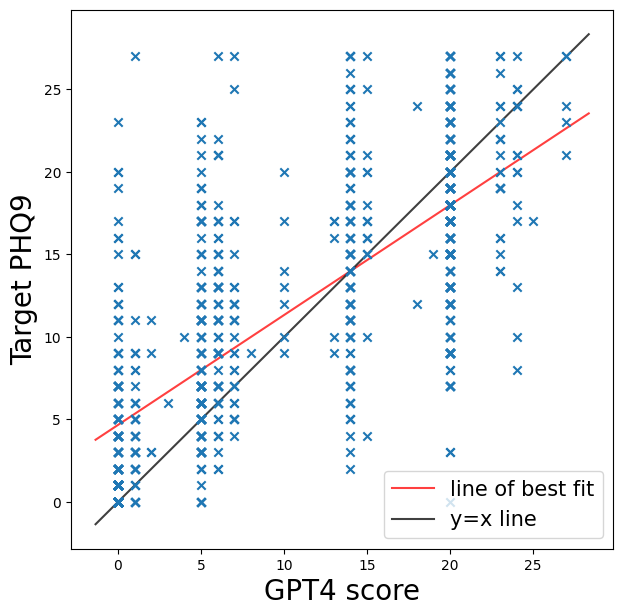

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(gpt4_responses_df['gpt4_predicted_value'], gpt4_responses_df['target_value'], marker='x')
# draw y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# draw y=mx+c line
ax.plot(lims, [m * x + c for x in lims], 'r-', alpha=0.75, zorder=0, label="line of best fit")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label="y=x line")
ax.set_ylabel('Target PHQ9', fontdict={'fontsize': 20})
ax.set_xlabel('GPT4 score', fontdict={'fontsize': 20})
plt.legend(fontsize=15)
plt.show()

In [23]:
gpt4_kjellScoring_merge_df = pd.merge(gpt4_responses_df, kjell_scoring_df, on='user_id', how='inner')
gpt4_kjellScoring_merge_df.head()

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value,dep_text,PHQ_tot_estimates_a,PHQ_tot_estimates_c,mean_c_a2_fmt,PHQtot3
0,45,My depression is something I've learnt to live...,5.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,Considering the symptoms mentioned in the text...,14.0,My depression is something I've learnt to live...,11.0,12.0,11.5,5
1,49,It’s becoming really stressful at the moment o...,19.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5.0,ItÄôs becoming really stressful at the moment...,7.0,7.0,7.0,19
2,70,Yes I am regularly depressed and end up drinki...,12.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20.0,Yes I am regularly depressed and end up drinki...,11.0,20.0,15.5,12
3,71,Over the last two weeks my mood has been posit...,1.0,The text provided does not seem to indicate an...,Based on the absence of depressive symptoms in...,None,"Given the lack of depressive symptoms, the dep...",0.0,Over the last two weeks my mood has been posit...,6.0,9.0,7.5,1
4,72,I'd been a little depressed off and on. Mainly...,10.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0,I'd been a little depressed off and on. Mainly...,7.0,6.0,6.5,10


In [24]:
print (gpt4_kjellScoring_merge_df[gpt4_kjellScoring_merge_df.mean_c_a2_fmt.isna()])
gpt4_kjellScoring_merge_df = gpt4_kjellScoring_merge_df[~gpt4_kjellScoring_merge_df.mean_c_a2_fmt.isna()]

    user_id                                          user_text  target_value  \
12      172  Please answer the question by typing at least ...          20.0   

                                             symptoms  \
12  The text provided does not contain any explici...   

                                        category_text category  \
12  Based on the lack of depressive symptoms in th...     None   

                                           score_text  gpt4_predicted_value  \
12  Given the absence of depressive symptoms in th...                   0.0   

                                             dep_text  PHQ_tot_estimates_a  \
12  Please answer the question by typing at least ...                  NaN   

    PHQ_tot_estimates_c  mean_c_a2_fmt  PHQtot3  
12                  NaN            NaN       20  


In [25]:
from scipy.stats import pearsonr

In [26]:
pred, target = gpt4_kjellScoring_merge_df.PHQtot3.values, gpt4_kjellScoring_merge_df.target_value.values
labels_pearson, p_val = pearsonr(pred, target)
print ('Pearson Correlation between the labels: ({}, {})'.format(round(labels_pearson, 3), round(p_val, 3)))

Pearson Correlation between the labels: (1.0, 0.0)


In [27]:
pred, target = gpt4_kjellScoring_merge_df.gpt4_predicted_value.values, gpt4_kjellScoring_merge_df.mean_c_a2_fmt.values
expert_gpt4_pearson, p_val = pearsonr(pred, target)
print ('Pearson Correlation between GPT and the experts avg: ({}, {})'.format(round(expert_gpt4_pearson, 3), round(p_val, 3)))

Pearson Correlation between GPT and the experts avg: (0.905, 0.0)


In [28]:
pred, target = gpt4_kjellScoring_merge_df.gpt4_predicted_value.values, gpt4_kjellScoring_merge_df.target_value.values
target_gpt4_pearson, p_val = pearsonr(pred, target)
print ('Pearson Correlation between GPT and target PHQ (Annotation data): ({}, {})'.format(round(target_gpt4_pearson, 3), round(p_val, 3)))
print ('-------------------------------------')
pred, target = gpt4_responses_df.gpt4_predicted_value.values, gpt4_responses_df.target_value.values
target_gpt4_pearson, p_val = pearsonr(pred, target)
print ('Pearson Correlation between GPT and target PHQ (Full data): ({}, {})'.format(round(target_gpt4_pearson, 3), round(p_val, 3)))

Pearson Correlation between GPT and target PHQ (Annotation data): (0.734, 0.0)
-------------------------------------
Pearson Correlation between GPT and target PHQ (Full data): (0.733, 0.0)


In [29]:
pred, target = gpt4_kjellScoring_merge_df.mean_c_a2_fmt.values, gpt4_kjellScoring_merge_df.target_value.values
target_expert_pearson, p_val = pearsonr(pred, target)
print ('Pearson Correlation between experts avg and target PHQ: ({}, {})'.format(round(target_expert_pearson, 3), round(p_val, 3)))

Pearson Correlation between experts avg and target PHQ: (0.733, 0.0)


In [32]:
between_experts_pearson, p_val = pearsonr(gpt4_kjellScoring_merge_df.PHQ_tot_estimates_a, gpt4_kjellScoring_merge_df.PHQ_tot_estimates_c)
print ('Pearson Correlation between experts: ({}, {})'.format(round(between_experts_pearson, 3), round(p_val, 3)))

Pearson Correlation between experts: (0.897, 0.0)


In [ ]:
from sklearn.linear_model import LinearRegression

Slope/Intercept of GPT4 score vs Experts avg: 0.55/3.64 


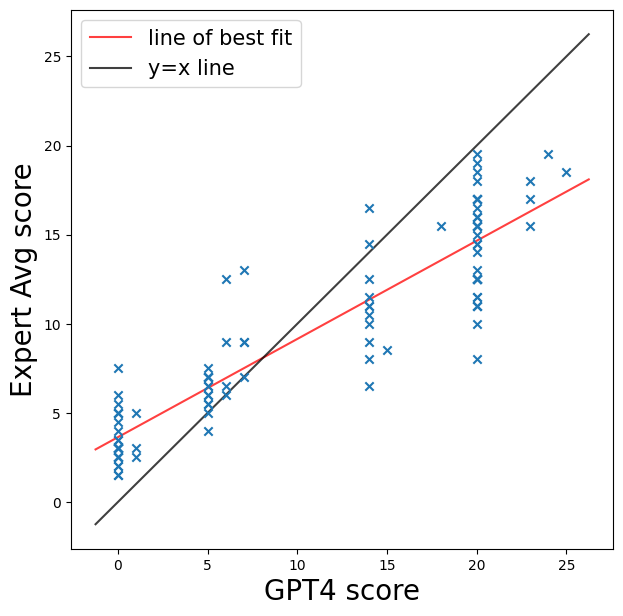

In [55]:
lr = LinearRegression()
lr.fit(gpt4_kjellScoring_merge_df['gpt4_predicted_value'].values.reshape(-1, 1), gpt4_kjellScoring_merge_df['mean_c_a2_fmt'].values.reshape(-1, 1))
m, c = lr.coef_[0, 0], lr.intercept_[0]
print ('Slope/Intercept of GPT4 score vs Experts avg: {}/{} '.format(round(m, 2), round(c, 2)))

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(gpt4_kjellScoring_merge_df['gpt4_predicted_value'], gpt4_kjellScoring_merge_df['mean_c_a2_fmt'], marker='x')
# draw y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# draw y=mx+c line
ax.plot(lims, [m * x + c for x in lims], 'r-', alpha=0.75, zorder=0, label="line of best fit")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label="y=x line")
ax.set_ylabel('Expert Avg score', fontdict={'fontsize': 20})
ax.set_xlabel('GPT4 score', fontdict={'fontsize': 20})
plt.legend(fontsize=15)
plt.show()

Slope/Intercept of PHQ9 total vs Experts avg: 1.16/1.65 


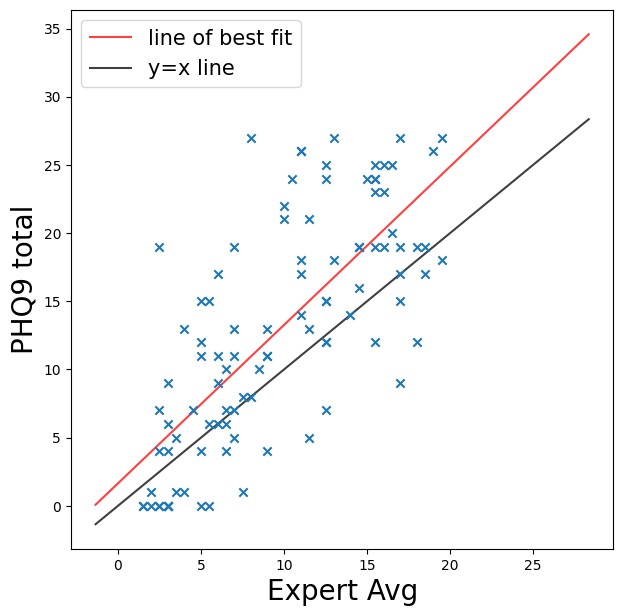

In [57]:
lr = LinearRegression()
lr.fit(gpt4_kjellScoring_merge_df['mean_c_a2_fmt'].values.reshape(-1, 1), gpt4_kjellScoring_merge_df['target_value'].values.reshape(-1, 1))
m, c = lr.coef_[0, 0], lr.intercept_[0]
print ('Slope/Intercept of PHQ9 total vs Experts avg: {}/{} '.format(round(m, 2), round(c, 2)))

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(gpt4_kjellScoring_merge_df['mean_c_a2_fmt'], gpt4_kjellScoring_merge_df['target_value'], marker='x')
# draw y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# draw y=mx+c line
ax.plot(lims, [m * x + c for x in lims], 'r-', alpha=0.75, zorder=0, label="line of best fit")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label="y=x line")
ax.set_ylabel('PHQ9 total', fontdict={'fontsize': 20})
ax.set_xlabel('Expert Avg', fontdict={'fontsize': 20})
plt.legend(fontsize=15)
plt.show()

Slope/Intercept of GPT4 score vs PHQ9 tot: 0.71/5.12 


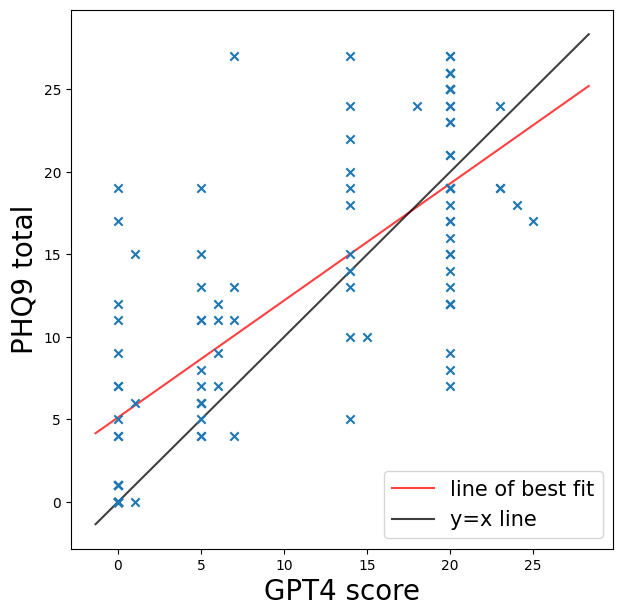

In [58]:
lr = LinearRegression()
lr.fit(gpt4_kjellScoring_merge_df['gpt4_predicted_value'].values.reshape(-1, 1), gpt4_kjellScoring_merge_df['target_value'].values.reshape(-1, 1))
m, c = lr.coef_[0, 0], lr.intercept_[0]
print ('Slope/Intercept of GPT4 score vs PHQ9 tot: {}/{} '.format(round(m, 2), round(c, 2)))

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(gpt4_kjellScoring_merge_df['gpt4_predicted_value'], gpt4_kjellScoring_merge_df['target_value'], marker='x')
# draw y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# draw y=mx+c line
ax.plot(lims, [m * x + c for x in lims], 'r-', alpha=0.75, zorder=0, label="line of best fit")
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label="y=x line")
ax.set_ylabel('PHQ9 total', fontdict={'fontsize': 20})
ax.set_xlabel('GPT4 score', fontdict={'fontsize': 20})
plt.legend(fontsize=15)
plt.show()

## Analysis: Categories

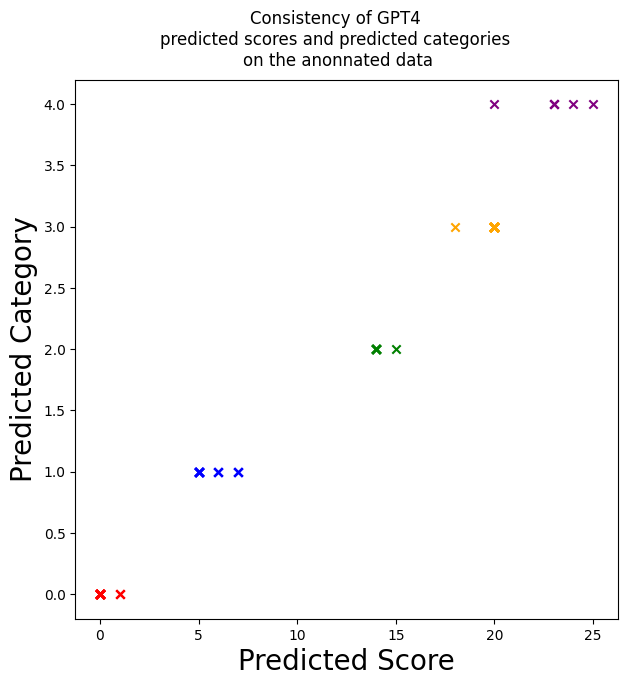

In [93]:
## Consistency of GPT4 predicted scores and predicted categories on the annotated data
x, y = gpt4_kjellScoring_merge_df.gpt4_predicted_value.values, gpt4_kjellScoring_merge_df.category.str.lower().map({'none':0, 'mild': 1, 'moderate': 2, 'moderately severe': 3, 'severe': 4}).values
colors=['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for i in sorted(np.unique(y)):
    ax.scatter(x[y==i], y[y==i], marker='x', c=colors[i])

ax.set_ylabel('Predicted Category', fontdict={'fontsize': 20})
ax.set_xlabel('Predicted Score', fontdict={'fontsize': 20})
plt.suptitle('Consistency of GPT4 \npredicted scores and predicted categories \non the anonnated data')
plt.show()

In [86]:
for i in sorted(np.unique(y)):
    print ('{}'.format(sorted(list(zip(x[y==i], y[y==i])))))

[(0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (1.0, 0), (1.0, 0), (1.0, 0)]
[(5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (5.0, 1), (6.0, 1), (6.0, 1), (6.0, 1), (6.0, 1), (7.0, 1), (7.0, 1), (7.0, 1), (7.0, 1)]
[(14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (14.0, 2), (15.0, 2)]
[(18.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3), (20.0, 3)]
[(20.0, 4), (23.0, 4)

In [87]:
gpt4_responses_df

,user_id,user_text,target_value,symptoms,category_text,category,score_text,gpt4_predicted_value
0,1,"Over the past two weeks, I have not been depre...",0.0,The text provided does not show any indication...,Based on the absence of any depressive symptom...,None,"Given the lack of depressive symptoms, the dep...",0.0
1,2,I don't think I have felt depressed. I'm not f...,17.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Mild,"To quantify their depression severity, conside...",5.0
2,3,I have been depressed because I am worried abo...,21.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
3,4,Over the past 2 weeks i have been feeling depr...,13.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",10.0
4,5,yes very much just seem everything is getting ...,9.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderately Severe,"To quantify their depression severity, conside...",20.0
...,...,...,...,...,...,...,...,...
951,972,There has been time when I have not wanted to ...,11.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
952,973,"I’m not sure if I’ve been depressed exactly, I...",20.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Moderate,"To quantify their depression severity, conside...",14.0
953,974,"I haven’t felt depressed. However, I have expe...",20.0,The indications or symptoms of depression evid...,"Based on the identified symptom, the individua...",Mild,Given the presence of mood swings but absence ...,5.0
954,975,I have suffered from depression since my early...,22.0,The indications or symptoms of depression evid...,"Based on these identified symptoms, the indivi...",Severe,Considering the severity and number of symptom...,23.0


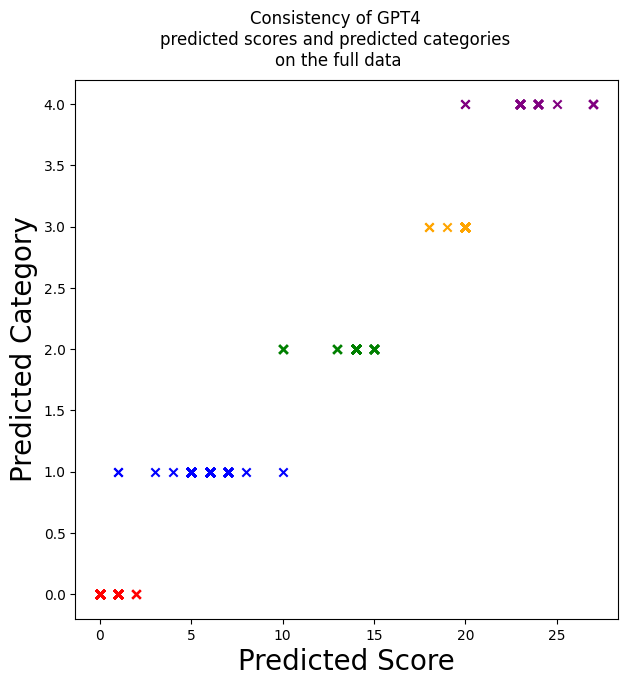

In [96]:
## Consistency of GPT4 predicted scores and predicted categories
x, y = gpt4_responses_df.gpt4_predicted_value.values, gpt4_responses_df.category.str.lower().map({'none':0, 'mild': 1, 'moderate': 2, 'moderately severe': 3, 'severe': 4}).values
colors=['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for i in sorted(np.unique(y)):
    ax.scatter(x[y==i], y[y==i], marker='x', c=colors[i])

ax.set_ylabel('Predicted Category', fontdict={'fontsize': 20})
ax.set_xlabel('Predicted Score', fontdict={'fontsize': 20})
plt.suptitle('Consistency of GPT4 \npredicted scores and predicted categories \non the full data')
plt.show()

In [98]:
# Mapping derived from: https://www.hiv.uw.edu/page/mental-health-screening/phq-9
score_map_dict = {}
for i in range(27, -1, -1):
    if i <=4:
        score_map_dict[i] = 0
    elif i <=9:
        score_map_dict[i] = 1
    elif i <=14:
        score_map_dict[i] = 2
    elif i <=19:
        score_map_dict[i] = 3
    elif i <=27:
        score_map_dict[i] = 4

In [100]:
from sklearn.metrics import confusion_matrix, classification_report

### Comparing GPT4 predictions with PHQ9 reports

In [103]:
print ('Classification Report for GPT4 prediction on the annotated data')
gpt4_score_to_category = gpt4_kjellScoring_merge_df.gpt4_predicted_value.map(score_map_dict).values
target_value_to_category = gpt4_kjellScoring_merge_df.target_value.map(score_map_dict).values
print (classification_report(target_value_to_category, gpt4_score_to_category))
print ('-------------------------------------------')
print (confusion_matrix(target_value_to_category, gpt4_score_to_category))

Classification Report for GPT4 prediction on the annotated data
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.38      0.47      0.42        17
           2       0.27      0.17      0.21        18
           3       0.00      0.00      0.00        22
           4       0.42      0.73      0.53        22

    accuracy                           0.44        99
   macro avg       0.34      0.44      0.38        99
weighted avg       0.34      0.44      0.37        99

-------------------------------------------
[[17  3  0  0  0]
 [ 5  8  1  0  3]
 [ 2  7  3  1  5]
 [ 3  2  3  0 14]
 [ 0  1  4  1 16]]


In [110]:
print ('Classification Report for GPT4 prediction on the annotated data')
gpt4_category = gpt4_kjellScoring_merge_df.category.str.lower().map({'none':0, 'mild': 1, 'moderate': 2, 'moderately severe': 3, 'severe': 4}).values
target_value_to_category = gpt4_kjellScoring_merge_df.target_value.map(score_map_dict).values
print (classification_report(target_value_to_category, gpt4_category))
print ('-------------------------------------------')
print (confusion_matrix(target_value_to_category, gpt4_category))

Classification Report for GPT4 prediction on the annotated data
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.38      0.47      0.42        17
           2       0.33      0.22      0.27        18
           3       0.30      0.45      0.36        22
           4       0.33      0.09      0.14        22

    accuracy                           0.41        99
   macro avg       0.40      0.42      0.38        99
weighted avg       0.39      0.41      0.38        99

-------------------------------------------
[[17  3  0  0  0]
 [ 5  8  1  3  0]
 [ 2  7  4  5  0]
 [ 3  2  3 10  4]
 [ 0  1  4 15  2]]


In [105]:
print ('Classification Report for GPT4 prediction on the full data')
gpt4_score_to_category = gpt4_responses_df.gpt4_predicted_value.map(score_map_dict).values
target_value_to_category = gpt4_responses_df.target_value.map(score_map_dict).values
print (classification_report(target_value_to_category, gpt4_score_to_category))
print ('-------------------------------------------')
print (confusion_matrix(target_value_to_category, gpt4_score_to_category))

Classification Report for GPT4 prediction on the full data
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       212
           1       0.41      0.51      0.46       204
           2       0.33      0.24      0.28       170
           3       0.55      0.05      0.10       201
           4       0.38      0.71      0.50       169

    accuracy                           0.46       956
   macro avg       0.47      0.46      0.41       956
weighted avg       0.48      0.46      0.42       956

-------------------------------------------
[[168  37   3   1   3]
 [ 54 104  21   0  25]
 [ 13  67  41   2  47]
 [  7  32  32  11 119]
 [  4  12  27   6 120]]


In [125]:
print ('Classification Report for GPT4 prediction on the full data')
gpt4_category = gpt4_responses_df.category.str.lower().map({'none':0, 'mild': 1, 'moderate': 2, 'moderately severe': 3, 'severe': 4}).values
target_value_to_category = gpt4_responses_df.target_value.map(score_map_dict).values
print (classification_report(target_value_to_category, gpt4_category))
print ('-------------------------------------------')
print (confusion_matrix(target_value_to_category, gpt4_category))

Classification Report for GPT4 prediction on the full data
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       212
           1       0.42      0.52      0.46       204
           2       0.30      0.25      0.27       170
           3       0.40      0.54      0.46       201
           4       0.64      0.17      0.27       169

    accuracy                           0.47       956
   macro avg       0.49      0.45      0.44       956
weighted avg       0.49      0.47      0.46       956

-------------------------------------------
[[167  38   4   3   0]
 [ 52 107  20  24   1]
 [ 12  68  42  44   4]
 [  7  32  42 109  11]
 [  4  12  32  92  29]]


### Comparing Expert Annotations with PHQ9 reports

In [127]:
print ('Classification Report for Target PHQ9 w/ Expert Annotation')
annotation_to_category = gpt4_kjellScoring_merge_df.mean_c_a2_fmt.map(lambda x: score_map_dict[round(x)]).values
target_value_to_category = gpt4_kjellScoring_merge_df.target_value.map(score_map_dict).values
print (classification_report(target_value_to_category, annotation_to_category))
print ('-------------------------------------------')
print (confusion_matrix(target_value_to_category, annotation_to_category))

Classification Report for Target PHQ9 w/ Expert Annotation
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.30      0.53      0.38        17
           2       0.21      0.28      0.24        18
           3       0.36      0.36      0.36        22
           4       0.50      0.05      0.08        22

    accuracy                           0.37        99
   macro avg       0.41      0.38      0.35        99
weighted avg       0.42      0.37      0.35        99

-------------------------------------------
[[14  6  0  0  0]
 [ 5  9  2  1  0]
 [ 1 10  5  2  0]
 [ 1  4  8  8  1]
 [ 0  1  9 11  1]]


### GPT4 predicted scores vs Expert annotations

In [123]:
print ('Classification Report for GPT4 prediction w/ Expert Annotation')
gpt4_score_to_category = gpt4_kjellScoring_merge_df.gpt4_predicted_value.map(score_map_dict).values
annotation_to_category = gpt4_kjellScoring_merge_df.mean_c_a2_fmt.map(lambda x: score_map_dict[round(x)]).values
print (classification_report(annotation_to_category, gpt4_score_to_category))
print ('-------------------------------------------')
print (confusion_matrix(annotation_to_category, gpt4_score_to_category))

Classification Report for GPT4 prediction w/ Expert Annotation
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.86      0.60      0.71        30
           2       0.64      0.29      0.40        24
           3       0.50      0.05      0.08        22
           4       0.05      1.00      0.10         2

    accuracy                           0.48        99
   macro avg       0.56      0.58      0.42        99
weighted avg       0.68      0.48      0.51        99

-------------------------------------------
[[20  1  0  0  0]
 [ 7 18  3  1  1]
 [ 0  2  7  0 15]
 [ 0  0  1  1 20]
 [ 0  0  0  0  2]]


In [124]:
print ('Classification Report for GPT4 prediction w/ Expert Annotation')
gpt4_category = gpt4_kjellScoring_merge_df.category.str.lower().map({'none':0, 'mild': 1, 'moderate': 2, 'moderately severe': 3, 'severe': 4}).values
annotation_to_category = gpt4_kjellScoring_merge_df.mean_c_a2_fmt.map(lambda x: score_map_dict[round(x)]).values
print (classification_report(annotation_to_category, gpt4_category))
print ('-------------------------------------------')
print (confusion_matrix( annotation_to_category, gpt4_category))

Classification Report for GPT4 prediction w/ Expert Annotation
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.86      0.60      0.71        30
           2       0.58      0.29      0.39        24
           3       0.52      0.77      0.62        22
           4       0.33      1.00      0.50         2

    accuracy                           0.65        99
   macro avg       0.61      0.72      0.61        99
weighted avg       0.68      0.65      0.63        99

-------------------------------------------
[[20  1  0  0  0]
 [ 7 18  4  1  0]
 [ 0  2  7 15  0]
 [ 0  0  1 17  4]
 [ 0  0  0  0  2]]
